### Need to change cells:
* Calculate factors
* Calculating Factor's Values
* Plotting Prices and Factor's values

In [7]:
import pandas as pd
import os
import time
import patoolib
import gzip
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import openpyxl

In [295]:
patoolib.extract_archive(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz", 
                         outdir=r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\")

patool: Extracting L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz ...
patool: running "C:\Program Files\7-Zip\7z.EXE" e -oL:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\ -- L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz


PatoolError: Command `['C:\\Program Files\\7-Zip\\7z.EXE', 'e', '-oL:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\\\', '--', 'L:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\EURUSD.pkl.gz']' returned non-zero exit status 255

In [8]:
df = pd.read_pickle(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl")
analyzed_df = df["2018-02"]

### Inspecting one day

In [9]:
analyzed_df["2018-02-23 09:06:58":"2018-02-23 09:07:02"]

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-02-23 09:06:58,1.231575,1.231575,1.231575,1.231575,NaN,09:06:58,nan,10:51:58,nan,39119
2018-02-23 09:06:59,1.231575,1.231575,1.231525,1.231525,NaN,09:06:59,nan,10:51:59,nan,39120
2018-02-23 09:07:00,1.231525,1.231575,1.231525,1.231575,NaN,09:07:00,nan,10:52:00,nan,39121
2018-02-23 09:07:01,1.231575,1.231575,1.231525,1.231525,NaN,09:07:01,nan,10:52:01,nan,39122
2018-02-23 09:07:02,1.231525,1.231575,1.231525,1.231575,NaN,09:07:02,nan,10:52:02,nan,39123


In [10]:
df["Trading_date_Actual_DateTime"].value_counts()

nan     15897600
Name: Trading_date_Actual_DateTime, dtype: int64

## Selecting Date and Size

In [90]:
class Trade_Size:
    size = 20000
    
trading_date = "2018-03"

start_date = "2018-03-01"
end_date = "2018-08-01"

#analyzed_df = df[trading_date]
analyzed_df = df.loc[start_date:end_date,:]
analyzed_df.head()

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-03-01 00:00:00,1.219175,1.219175,1.219150,1.219175,NaN,00:00:00,nan,01:45:00,nan,6301
2018-03-01 00:00:01,1.219175,1.219175,1.219175,1.219175,NaN,00:00:01,nan,01:45:01,nan,6302
2018-03-01 00:00:02,1.219175,1.219175,1.219100,1.219100,NaN,00:00:02,nan,01:45:02,nan,6303
2018-03-01 00:00:03,1.219100,1.219125,1.219100,1.219125,NaN,00:00:03,nan,01:45:03,nan,6304
2018-03-01 00:00:04,1.219125,1.219125,1.219125,1.219125,NaN,00:00:04,nan,01:45:04,nan,6305


### Resampling into 1 Minute bars

In [91]:
min_1_low = analyzed_df.loc[:,"Low"].resample("T").apply(np.min)
min_1_high = analyzed_df.loc[:,"High"].resample("T").apply(np.max)
min_1_open = analyzed_df.loc[:,"Open"].resample("T").first()
min_1_close = analyzed_df.loc[:,"Close"].resample("T").last()
min_1_Trading_date_Actual_Time = analyzed_df.loc[:,"Trading_date_Actual_Time"].resample("T").first()
min_1_Trading_date_Sequential_Time = analyzed_df.loc[:,"Trading_date_Sequential_Time"].resample("T").first()

min_1_analyzed_df = pd.DataFrame.from_dict({"Open":min_1_open,"High":min_1_high,"Low":min_1_low,"Close":min_1_close,
                                        "Trading_date_Actual_Time":min_1_Trading_date_Actual_Time,
                                        "Trading_date_Sequential_Time":min_1_Trading_date_Sequential_Time})

min_1_analyzed_df.head()

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time
DateTime_UTC,,,,,,
2018-03-01 00:00:00,1.219175,1.219175,1.219050,1.219125,00:00:00,01:45:00
2018-03-01 00:01:00,1.219125,1.219125,1.219075,1.219125,00:01:00,01:46:00
2018-03-01 00:02:00,1.219125,1.219175,1.219125,1.219175,00:02:00,01:47:00
2018-03-01 00:03:00,1.219175,1.219225,1.219175,1.219225,00:03:00,01:48:00
2018-03-01 00:04:00,1.219225,1.219225,1.219175,1.219175,00:04:00,01:49:00


### Calculate factors

In [92]:
min_1_analyzed_df["Middle_Band"] = min_1_analyzed_df["Close"].rolling(20).mean()
min_1_analyzed_df["Upper_Band"] = min_1_analyzed_df["Middle_Band"] + (min_1_analyzed_df["Close"].rolling(20).std()*2)
min_1_analyzed_df["Lower_Band"] = min_1_analyzed_df["Middle_Band"] - (min_1_analyzed_df["Close"].rolling(20).std()*2)
min_1_analyzed_df["Prev_Lower_Band"] = min_1_analyzed_df["Lower_Band"].shift(1)
min_1_analyzed_df["Prev_Upper_Band"] = min_1_analyzed_df["Upper_Band"].shift(1)
min_1_analyzed_df["Is_Prev_Cndl_Up"] = ((min_1_analyzed_df["Close"].shift(1) - min_1_analyzed_df["Open"].shift(1)) >= 0)
min_1_analyzed_df["Five_per_std"] = min_1_analyzed_df["Close"].rolling(5).std()
min_1_analyzed_df["Prev_High"] = min_1_analyzed_df["High"].shift(1)
min_1_analyzed_df["Prev_Low"] = min_1_analyzed_df["Low"].shift(1)

# min_1_analyzed_df["SMA10_vs_SMA20"] = min_1_analyzed_df["SMA10"] - min_1_analyzed_df["SMA20"]
# min_1_analyzed_df["SMA10_vs_SMA20_Shifted"] = min_1_analyzed_df["SMA10_vs_SMA20"].shift(1)
min_1_analyzed_df.head(25)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low
DateTime_UTC,,,,,,,,,,,,,,,
2018-03-01 00:00:00,1.219175,1.219175,1.219050,1.219125,00:00:00,01:45:00,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2018-03-01 00:01:00,1.219125,1.219125,1.219075,1.219125,00:01:00,01:46:00,NaN,NaN,NaN,NaN,NaN,False,NaN,1.219175,1.219050
2018-03-01 00:02:00,1.219125,1.219175,1.219125,1.219175,00:02:00,01:47:00,NaN,NaN,NaN,NaN,NaN,True,NaN,1.219125,1.219075
2018-03-01 00:03:00,1.219175,1.219225,1.219175,1.219225,00:03:00,01:48:00,NaN,NaN,NaN,NaN,NaN,True,NaN,1.219175,1.219125
2018-03-01 00:04:00,1.219225,1.219225,1.219175,1.219175,00:04:00,01:49:00,NaN,NaN,NaN,NaN,NaN,True,0.000042,1.219225,1.219175
2018-03-01 00:05:00,1.219175,1.219175,1.219075,1.219125,00:05:00,01:50:00,NaN,NaN,NaN,NaN,NaN,False,0.000042,1.219225,1.219175
2018-03-01 00:06:00,1.219125,1.219125,1.219075,1.219125,00:06:00,01:51:00,NaN,NaN,NaN,NaN,NaN,False,0.000042,1.219175,1.219075
2018-03-01 00:07:00,1.219125,1.219300,1.219125,1.219275,00:07:00,01:52:00,NaN,NaN,NaN,NaN,NaN,True,0.000065,1.219125,1.219075
2018-03-01 00:08:00,1.219275,1.219275,1.219275,1.219275,00:08:00,01:53:00,NaN,NaN,NaN,NaN,NaN,True,0.000076,1.219300,1.219125


In [93]:
min_1_analyzed_df.dropna(inplace=True)
min_1_analyzed_df.head(35)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low
DateTime_UTC,,,,,,,,,,,,,,,
2018-03-01 00:20:00,1.218725,1.218875,1.218675,1.218825,00:20:00,02:05:00,1.219172,1.219512,1.218833,1.218889,1.219486,False,0.000182,1.218975,1.218550
2018-03-01 00:21:00,1.218825,1.218950,1.218775,1.218825,00:21:00,02:06:00,1.219157,1.219531,1.218784,1.218833,1.219512,True,0.000139,1.218875,1.218675
2018-03-01 00:22:00,1.218825,1.218950,1.218775,1.218775,00:22:00,02:07:00,1.219137,1.219548,1.218727,1.218784,1.219531,True,0.000094,1.218950,1.218775
2018-03-01 00:23:00,1.218775,1.218775,1.218675,1.218675,00:23:00,02:08:00,1.219110,1.219567,1.218653,1.218727,1.219548,False,0.000065,1.218950,1.218775
2018-03-01 00:24:00,1.218675,1.218675,1.218525,1.218575,00:24:00,02:09:00,1.219080,1.219594,1.218566,1.218653,1.219567,False,0.000108,1.218775,1.218675
2018-03-01 00:25:00,1.218575,1.218575,1.218525,1.218525,00:25:00,02:10:00,1.219050,1.219620,1.218480,1.218566,1.219594,False,0.000127,1.218675,1.218525
2018-03-01 00:26:00,1.218525,1.218675,1.218425,1.218650,00:26:00,02:11:00,1.219026,1.219622,1.218431,1.218480,1.219620,False,0.000096,1.218575,1.218525
2018-03-01 00:27:00,1.218650,1.218650,1.218525,1.218525,00:27:00,02:12:00,1.218989,1.219612,1.218365,1.218431,1.219622,True,0.000070,1.218675,1.218425
2018-03-01 00:28:00,1.218525,1.218525,1.218375,1.218425,00:28:00,02:13:00,1.218946,1.219603,1.218290,1.218365,1.219612,False,0.000082,1.218650,1.218525


### Filter for including only certain times of the day

In [94]:
filter_days = []
filter_hours = range(11,12)
filter_mins = []
filter_secs = []

min_1_analyzed_df = min_1_analyzed_df[min_1_analyzed_df.index.hour.isin(filter_hours)]
min_1_analyzed_df.shape

(6600, 15)

In [95]:
min_1_analyzed_df["Period_Number"] = range(0,min_1_analyzed_df.shape[0])
min_1_analyzed_df.head(100)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low,Period_Number
DateTime_UTC,,,,,,,,,,,,,,,,
2018-03-01 11:00:00,1.218775,1.218825,1.218675,1.218675,11:00:00,12:45:00,1.219173,1.219647,1.218698,1.218735,1.219625,False,0.000292,1.219125,1.218775,0
2018-03-01 11:01:00,1.218675,1.218725,1.218325,1.218375,11:01:00,12:46:00,1.219155,1.219717,1.218593,1.218698,1.219647,False,0.000351,1.218825,1.218675,1
2018-03-01 11:02:00,1.218375,1.218575,1.218375,1.218425,11:02:00,12:47:00,1.219123,1.219772,1.218473,1.218593,1.219717,False,0.000284,1.218725,1.218325,2
2018-03-01 11:03:00,1.218425,1.218475,1.218375,1.218425,11:03:00,12:48:00,1.219100,1.219814,1.218386,1.218473,1.219772,True,0.000178,1.218575,1.218375,3
2018-03-01 11:04:00,1.218425,1.218525,1.218375,1.218375,11:04:00,12:49:00,1.219058,1.219838,1.218277,1.218386,1.219814,True,0.000125,1.218475,1.218375,4
2018-03-01 11:05:00,1.218375,1.218475,1.218325,1.218400,11:05:00,12:50:00,1.219016,1.219845,1.218187,1.218277,1.219838,False,0.000025,1.218525,1.218375,5
2018-03-01 11:06:00,1.218400,1.218725,1.218375,1.218725,11:06:00,12:51:00,1.218990,1.219821,1.218159,1.218187,1.219845,True,0.000144,1.218475,1.218325,6
2018-03-01 11:07:00,1.218725,1.218775,1.218375,1.218375,11:07:00,12:52:00,1.218940,1.219793,1.218087,1.218159,1.219821,True,0.000150,1.218725,1.218375,7
2018-03-01 11:08:00,1.218375,1.218525,1.218375,1.218475,11:08:00,12:53:00,1.218900,1.219762,1.218038,1.218087,1.219793,False,0.000148,1.218775,1.218375,8


# Testing factor

## Calculating Factor's Values

#### Entry:
1. lower BB needs to start declining
2. AND the upper BB needs to start rising (or be rising)
3. AND the previous candle was in the direction of the trade (e.g. higher)
4. AND the current price gets above previous candle's high
5. AND the current' candle's high needs to be above the midle band (SMA)
6. AND the 5 period standard deviation of CLOSE needs to be under or equal 0.00011

#### Stop/Exit:
Test each of these:
 1. stop 2 pips below the midle band (SMA) AND below the low of previous candle - NOT GOOD
 2. stop below the midle band (SMA) - NOT GOOD
 3. stop 2 pips below the midle band (SMA) - NOT GOOD
 4. stop below the low of previous candle
 5. stop below 50% between lower band and middle band (SMA) - for long
 
#### To make the strategy more profitable:
 1. Run it only during more volatile times of the day
 2. OR run it only if historical volatility (measured via std dev) is over certain value

In [96]:
class pos_open:    
    
    is_position_open = False

    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False

def enter_factor(row):
    if (row.Lower_Band <= row.Prev_Lower_Band) \
    & (row.Upper_Band > row.Prev_Upper_Band) \
    & (row.Is_Prev_Cndl_Up == True) \
    & (row.High > row.Prev_High) \
    & (row.High > row.Middle_Band) \
    & (row.Five_per_std <= 0.00011) \
    & (pos_open.is_position_open == False):
        entry = True
    else:
        entry = False
    return entry

#(row.Low < (row.Middle_Band*0.999998))
def take_profit(row):
    if (row.Low < row.Prev_Low) \
    & (pos_open.is_position_open == True):
        take_prft = True
    else:
        take_prft = False
    return take_prft

# def stop_loss(row):
#     if (row.Close_vs_SMA20 < 0) & (pos_open.is_position_open == True):
#         stop_lss = True
#     else:
#         stop_lss = False
#     return stop_lss

def action_func(row):

    #rtn = str(pos_open.is_position_open)
    
    # Enter position
    if enter_factor(row):
        pos_open.position_opened(opened=True)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Entered" #+ "_" + rtn
        #print("3")
        
    # Check if exit criteria has been met
    elif take_profit(row):
        pos_open.position_opened(opened=False)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Took Profit" #+ "_" + rtn
    
    # Check if exit criteria has been met
#     elif stop_loss(row):
#         pos_open.position_opened(opened=False)
#         return "Stopped Out"
        
    else:
        #rtn = "else" 
        return "Waiting" #+ "_" + rtn 

min_1_analyzed_df["Action"] = min_1_analyzed_df.apply(action_func, axis=1)

min_1_analyzed_df.head(50)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low,Period_Number,Action
DateTime_UTC,,,,,,,,,,,,,,,,,
2018-03-01 11:00:00,1.218775,1.218825,1.218675,1.218675,11:00:00,12:45:00,1.219173,1.219647,1.218698,1.218735,1.219625,False,0.000292,1.219125,1.218775,0,Waiting
2018-03-01 11:01:00,1.218675,1.218725,1.218325,1.218375,11:01:00,12:46:00,1.219155,1.219717,1.218593,1.218698,1.219647,False,0.000351,1.218825,1.218675,1,Waiting
2018-03-01 11:02:00,1.218375,1.218575,1.218375,1.218425,11:02:00,12:47:00,1.219123,1.219772,1.218473,1.218593,1.219717,False,0.000284,1.218725,1.218325,2,Waiting
2018-03-01 11:03:00,1.218425,1.218475,1.218375,1.218425,11:03:00,12:48:00,1.219100,1.219814,1.218386,1.218473,1.219772,True,0.000178,1.218575,1.218375,3,Waiting
2018-03-01 11:04:00,1.218425,1.218525,1.218375,1.218375,11:04:00,12:49:00,1.219058,1.219838,1.218277,1.218386,1.219814,True,0.000125,1.218475,1.218375,4,Waiting
2018-03-01 11:05:00,1.218375,1.218475,1.218325,1.218400,11:05:00,12:50:00,1.219016,1.219845,1.218187,1.218277,1.219838,False,0.000025,1.218525,1.218375,5,Waiting
2018-03-01 11:06:00,1.218400,1.218725,1.218375,1.218725,11:06:00,12:51:00,1.218990,1.219821,1.218159,1.218187,1.219845,True,0.000144,1.218475,1.218325,6,Waiting
2018-03-01 11:07:00,1.218725,1.218775,1.218375,1.218375,11:07:00,12:52:00,1.218940,1.219793,1.218087,1.218159,1.219821,True,0.000150,1.218725,1.218375,7,Waiting
2018-03-01 11:08:00,1.218375,1.218525,1.218375,1.218475,11:08:00,12:53:00,1.218900,1.219762,1.218038,1.218087,1.219793,False,0.000148,1.218775,1.218375,8,Waiting


In [97]:
min_1_analyzed_df["Action"].value_counts()

Waiting        6446
Entered          77
Took Profit      77
Name: Action, dtype: int64

In [98]:
min_1_analyzed_df.head(50)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low,Period_Number,Action
DateTime_UTC,,,,,,,,,,,,,,,,,
2018-03-01 11:00:00,1.218775,1.218825,1.218675,1.218675,11:00:00,12:45:00,1.219173,1.219647,1.218698,1.218735,1.219625,False,0.000292,1.219125,1.218775,0,Waiting
2018-03-01 11:01:00,1.218675,1.218725,1.218325,1.218375,11:01:00,12:46:00,1.219155,1.219717,1.218593,1.218698,1.219647,False,0.000351,1.218825,1.218675,1,Waiting
2018-03-01 11:02:00,1.218375,1.218575,1.218375,1.218425,11:02:00,12:47:00,1.219123,1.219772,1.218473,1.218593,1.219717,False,0.000284,1.218725,1.218325,2,Waiting
2018-03-01 11:03:00,1.218425,1.218475,1.218375,1.218425,11:03:00,12:48:00,1.219100,1.219814,1.218386,1.218473,1.219772,True,0.000178,1.218575,1.218375,3,Waiting
2018-03-01 11:04:00,1.218425,1.218525,1.218375,1.218375,11:04:00,12:49:00,1.219058,1.219838,1.218277,1.218386,1.219814,True,0.000125,1.218475,1.218375,4,Waiting
2018-03-01 11:05:00,1.218375,1.218475,1.218325,1.218400,11:05:00,12:50:00,1.219016,1.219845,1.218187,1.218277,1.219838,False,0.000025,1.218525,1.218375,5,Waiting
2018-03-01 11:06:00,1.218400,1.218725,1.218375,1.218725,11:06:00,12:51:00,1.218990,1.219821,1.218159,1.218187,1.219845,True,0.000144,1.218475,1.218325,6,Waiting
2018-03-01 11:07:00,1.218725,1.218775,1.218375,1.218375,11:07:00,12:52:00,1.218940,1.219793,1.218087,1.218159,1.219821,True,0.000150,1.218725,1.218375,7,Waiting
2018-03-01 11:08:00,1.218375,1.218525,1.218375,1.218475,11:08:00,12:53:00,1.218900,1.219762,1.218038,1.218087,1.219793,False,0.000148,1.218775,1.218375,8,Waiting


### Creating dummy date field for charting purposes

In [99]:
min_1_analyzed_df["New_Date"] = pd.date_range(start="2000-01-01", periods=min_1_analyzed_df.shape[0])
min_1_analyzed_df

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low,Period_Number,Action,New_Date
DateTime_UTC,,,,,,,,,,,,,,,,,,
2018-03-01 11:00:00,1.218775,1.218825,1.218675,1.218675,11:00:00,12:45:00,1.219173,1.219647,1.218698,1.218735,1.219625,False,0.000292,1.219125,1.218775,0,Waiting,2000-01-01
2018-03-01 11:01:00,1.218675,1.218725,1.218325,1.218375,11:01:00,12:46:00,1.219155,1.219717,1.218593,1.218698,1.219647,False,0.000351,1.218825,1.218675,1,Waiting,2000-01-02
2018-03-01 11:02:00,1.218375,1.218575,1.218375,1.218425,11:02:00,12:47:00,1.219123,1.219772,1.218473,1.218593,1.219717,False,0.000284,1.218725,1.218325,2,Waiting,2000-01-03
2018-03-01 11:03:00,1.218425,1.218475,1.218375,1.218425,11:03:00,12:48:00,1.219100,1.219814,1.218386,1.218473,1.219772,True,0.000178,1.218575,1.218375,3,Waiting,2000-01-04
2018-03-01 11:04:00,1.218425,1.218525,1.218375,1.218375,11:04:00,12:49:00,1.219058,1.219838,1.218277,1.218386,1.219814,True,0.000125,1.218475,1.218375,4,Waiting,2000-01-05
2018-03-01 11:05:00,1.218375,1.218475,1.218325,1.218400,11:05:00,12:50:00,1.219016,1.219845,1.218187,1.218277,1.219838,False,0.000025,1.218525,1.218375,5,Waiting,2000-01-06
2018-03-01 11:06:00,1.218400,1.218725,1.218375,1.218725,11:06:00,12:51:00,1.218990,1.219821,1.218159,1.218187,1.219845,True,0.000144,1.218475,1.218325,6,Waiting,2000-01-07
2018-03-01 11:07:00,1.218725,1.218775,1.218375,1.218375,11:07:00,12:52:00,1.218940,1.219793,1.218087,1.218159,1.219821,True,0.000150,1.218725,1.218375,7,Waiting,2000-01-08
2018-03-01 11:08:00,1.218375,1.218525,1.218375,1.218475,11:08:00,12:53:00,1.218900,1.219762,1.218038,1.218087,1.219793,False,0.000148,1.218775,1.218375,8,Waiting,2000-01-09


In [100]:
# min_1_analyzed_df_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
# min_1_analyzed_df_analysis

In [101]:
# writer = pd.ExcelWriter(r"E:\Tst\tst.xlsx")
# min_1_analyzed_df.to_excel(writer,'Sheet1')
# writer.save()

## Plotting Prices and Factor's values

#### Rows and columns to plot

In [102]:
# Rows to Chart:
#   All:
#   rows_to_chart = min_1_analyzed_df.shape[0]
#   Specific ones ("Period_Number" from table below):
rows_to_chart = range(600,630)

# Dataframe (Columns) to Chart:
#   For LINE chart:
min_1_analyzed_df_line_chart = min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],["Close", "Middle_Band", "Upper_Band", "Lower_Band"]]
#   For CANDLE chart:
min_1_analyzed_df_candle_chart = min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],["Open", "High","Low", "Close", "Middle_Band", "Upper_Band", "Lower_Band"]].set_index(min_1_analyzed_df.loc[min_1_analyzed_df.index[rows_to_chart],'New_Date'])

### Line Chart

c:\python 3.7\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\python 3.7\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


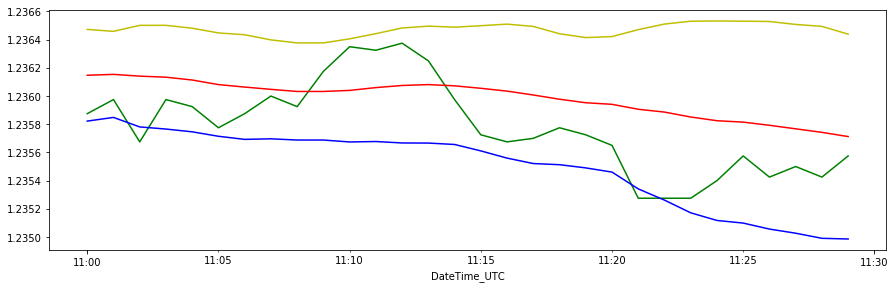

In [103]:
#%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(3,1,1)
# Close price
min_1_analyzed_df_line_chart["Close"].plot(ax=ax1, color="g")
#min_1_analyzed_df.iloc[rows_to_chart,3:4].plot(ax=ax1, color="g")
ax2 = plt.subplot(3,1,1)
# Middle band (20SMA)
min_1_analyzed_df_line_chart["Middle_Band"].plot(ax=ax1, color="r")
#min_1_analyzed_df.iloc[rows_to_chart,6:7].plot(ax=ax1, color="r")
ax3 = plt.subplot(3,1,1)
# Upper band
min_1_analyzed_df_line_chart["Upper_Band"].plot(ax=ax1, color="y")
#min_1_analyzed_df.iloc[rows_to_chart,7:8].plot(ax=ax1, color="y")
# Lower band
min_1_analyzed_df_line_chart["Lower_Band"].plot(ax=ax1, color="b")
#min_1_analyzed_df.iloc[rows_to_chart,8:9].plot(ax=ax1, color="b")
plt.show()

### Candlestick Chart

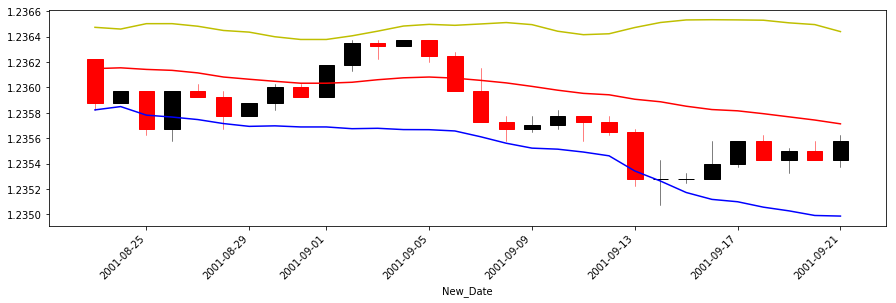

In [104]:
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12
hourFormatter = DateFormatter('%h')

fig1 = plt.figure(figsize=(15,15))
ax10 = plt.subplot(3,1,1)
fig1.subplots_adjust(bottom=0.2)
# ax10.xaxis.set_major_locator(mondays)
# ax10.xaxis.set_minor_locator(alldays)
# ax10.xaxis.set_major_formatter(dayFormatter)
ax10.xaxis.set_minor_formatter(hourFormatter)

candlestick_ohlc(ax10, zip(mdates.date2num(min_1_analyzed_df_candle_chart.index),
                         min_1_analyzed_df_candle_chart['Open'], min_1_analyzed_df_candle_chart['High'],
                         min_1_analyzed_df_candle_chart['Low'], min_1_analyzed_df_candle_chart['Close']), width=0.6)

min_1_analyzed_df_candle_chart["Middle_Band"].plot(ax=ax10, color="r")
min_1_analyzed_df_candle_chart["Upper_Band"].plot(ax=ax10, color="y")
min_1_analyzed_df_candle_chart["Lower_Band"].plot(ax=ax10, color="b")

ax10.xaxis_date()
ax10.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Calculating Factor's Profit and Loss

1. Change long_or_short
2. Change prices (high or low) in trd_price_and_prft

In [105]:
class long_or_short_cls:
    # Long = 0
    # Short = 1
    long_or_short = 0
    
class Pos_Open:
    is_position_open = False
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
        
class Prft_lss_calc:
    entry_value = 0
    exit_value = 0
    prft_lss = 0
    
    def round_down(self, n):
        return (np.floor(n*100))/100
        
    @classmethod
    def add_to_pos(cls, price):
        cls.entry_value = price*Trade_Size.size
#     def close_pos(cls, price):
#         cls.current_position += -price*Trade_Size.size
    def prft_lss_cal(self, price):
        self.exit_value = price*Trade_Size.size
        if long_or_short_cls.long_or_short == 0:
            self.prft_lss = self.round_down(self.exit_value - Prft_lss_calc.entry_value)
        else:
            self.prft_lss = self.round_down(Prft_lss_calc.entry_value - self.exit_value)
        return self.prft_lss
        
def trd_price_and_prft(row):
    
    p_l_calc = Prft_lss_calc()
    
    if (row.Action == "Entered") & (Pos_Open.is_position_open == False):
        p_l_calc.add_to_pos(row.High)
        Pos_Open.position_opened(True)
        return [row.High,0]
    
    elif (row.Action == "Took Profit") & (Pos_Open.is_position_open == True):
#         Prft_lss_calc.close_pos(row.High)
        Pos_Open.position_opened(False)
        
        return [row.Low,p_l_calc.prft_lss_cal(row.Low)]
    
    else:
        return[np.NaN,0]

min_1_analyzed_df["Trade_Prc_and_Prft"] = min_1_analyzed_df.apply(trd_price_and_prft, axis=1)
min_1_analyzed_df["Trade_Prft_Lss"] = min_1_analyzed_df["Trade_Prc_and_Prft"].apply(lambda x: x[1])
min_1_analyzed_df.head(80)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low,Period_Number,Action,New_Date,Trade_Prc_and_Prft,Trade_Prft_Lss
DateTime_UTC,,,,,,,,,,,,,,,,,,,,
2018-03-01 11:00:00,1.218775,1.218825,1.218675,1.218675,11:00:00,12:45:00,1.219173,1.219647,1.218698,1.218735,1.219625,False,0.000292,1.219125,1.218775,0,Waiting,2000-01-01,"[nan, 0]",0.0
2018-03-01 11:01:00,1.218675,1.218725,1.218325,1.218375,11:01:00,12:46:00,1.219155,1.219717,1.218593,1.218698,1.219647,False,0.000351,1.218825,1.218675,1,Waiting,2000-01-02,"[nan, 0]",0.0
2018-03-01 11:02:00,1.218375,1.218575,1.218375,1.218425,11:02:00,12:47:00,1.219123,1.219772,1.218473,1.218593,1.219717,False,0.000284,1.218725,1.218325,2,Waiting,2000-01-03,"[nan, 0]",0.0
2018-03-01 11:03:00,1.218425,1.218475,1.218375,1.218425,11:03:00,12:48:00,1.219100,1.219814,1.218386,1.218473,1.219772,True,0.000178,1.218575,1.218375,3,Waiting,2000-01-04,"[nan, 0]",0.0
2018-03-01 11:04:00,1.218425,1.218525,1.218375,1.218375,11:04:00,12:49:00,1.219058,1.219838,1.218277,1.218386,1.219814,True,0.000125,1.218475,1.218375,4,Waiting,2000-01-05,"[nan, 0]",0.0
2018-03-01 11:05:00,1.218375,1.218475,1.218325,1.218400,11:05:00,12:50:00,1.219016,1.219845,1.218187,1.218277,1.219838,False,0.000025,1.218525,1.218375,5,Waiting,2000-01-06,"[nan, 0]",0.0
2018-03-01 11:06:00,1.218400,1.218725,1.218375,1.218725,11:06:00,12:51:00,1.218990,1.219821,1.218159,1.218187,1.219845,True,0.000144,1.218475,1.218325,6,Waiting,2000-01-07,"[nan, 0]",0.0
2018-03-01 11:07:00,1.218725,1.218775,1.218375,1.218375,11:07:00,12:52:00,1.218940,1.219793,1.218087,1.218159,1.219821,True,0.000150,1.218725,1.218375,7,Waiting,2000-01-08,"[nan, 0]",0.0
2018-03-01 11:08:00,1.218375,1.218525,1.218375,1.218475,11:08:00,12:53:00,1.218900,1.219762,1.218038,1.218087,1.219793,False,0.000148,1.218775,1.218375,8,Waiting,2000-01-09,"[nan, 0]",0.0


In [106]:
min_1_analyzed_df_dist_analysis = min_1_analyzed_df[min_1_analyzed_df["Action"] != "Waiting"]
min_1_analyzed_df_dist_analysis

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Prev_Lower_Band,Prev_Upper_Band,Is_Prev_Cndl_Up,Five_per_std,Prev_High,Prev_Low,Period_Number,Action,New_Date,Trade_Prc_and_Prft,Trade_Prft_Lss
DateTime_UTC,,,,,,,,,,,,,,,,,,,,
2018-03-02 11:36:00,1.231725,1.231925,1.231725,1.231875,11:36:00,13:21:00,1.231440,1.232013,1.230867,1.230880,1.231985,True,0.000097,1.231800,1.231575,96,Entered,2000-04-06,"[1.231925, 0]",0.00
2018-03-02 11:37:00,1.231875,1.231875,1.231525,1.231575,11:37:00,13:22:00,1.231425,1.231965,1.230885,1.230867,1.232013,True,0.000120,1.231925,1.231725,97,Took Profit,2000-04-07,"[1.231525, -8.0]",-8.00
2018-03-05 11:58:00,1.229925,1.230125,1.229925,1.230125,11:58:00,13:43:00,1.229934,1.230191,1.229677,1.229684,1.230168,True,0.000097,1.229975,1.229825,178,Entered,2000-06-27,"[1.230125, 0]",0.00
2018-03-06 11:05:00,1.234775,1.234775,1.234425,1.234425,11:05:00,12:50:00,1.234694,1.235119,1.234269,1.234285,1.235113,False,0.000189,1.234850,1.234775,185,Took Profit,2000-07-04,"[1.234425, 86.0]",86.00
2018-03-06 11:53:00,1.238725,1.239225,1.238725,1.238875,11:53:00,13:38:00,1.238512,1.239040,1.237985,1.237995,1.239015,True,0.000065,1.238875,1.238575,233,Entered,2000-08-21,"[1.239225, 0]",0.00
2018-03-06 11:54:00,1.238875,1.238925,1.238675,1.238875,11:54:00,13:39:00,1.238542,1.239082,1.238003,1.237985,1.239040,True,0.000076,1.239225,1.238725,234,Took Profit,2000-08-22,"[1.238675, -11.0]",-11.00
2018-03-08 11:56:00,1.237325,1.237375,1.237325,1.237375,11:56:00,13:41:00,1.237184,1.237459,1.236908,1.236910,1.237432,True,0.000096,1.237325,1.237225,356,Entered,2000-12-22,"[1.237375, 0]",0.00
2018-03-09 11:00:00,1.229400,1.229525,1.229150,1.229225,11:00:00,12:45:00,1.229884,1.230337,1.229430,1.229589,1.230261,False,0.000261,1.229725,1.229250,360,Took Profit,2000-12-26,"[1.22915, -164.5]",-164.50
2018-03-14 11:22:00,1.237725,1.237775,1.237575,1.237775,11:22:00,14:07:00,1.237360,1.237961,1.236759,1.236773,1.237912,True,0.000079,1.237725,1.237525,562,Entered,2001-07-16,"[1.237775, 0]",0.00


### P&L time distribution

#### Prep

In [107]:
min_1_analyzed_df_dist_analysis["Trade_Entry_Time"] = min_1_analyzed_df_dist_analysis.index
min_1_analyzed_df_dist_analysis["Trade_Entry_Time_Shifted"] = min_1_analyzed_df_dist_analysis["Trade_Entry_Time"].shift(1)
min_1_analyzed_df_dist_analysis.drop("Trade_Entry_Time",axis=1, inplace=True)
min_1_analyzed_df_dist_analysis_exists_only = min_1_analyzed_df_dist_analysis.loc[min_1_analyzed_df_dist_analysis \
["Action"] == "Took Profit",:]
min_1_analyzed_df_dist_analysis_exists_only["Hour_of_Entry"] = min_1_analyzed_df_dist_analysis_exists_only \
["Trade_Entry_Time_Shifted"].apply(lambda x: x.hour)

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python 3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python 3.7\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
c

#### Time distribution of Profits

AxesSubplot(0.125,0.125;0.775x0.755)


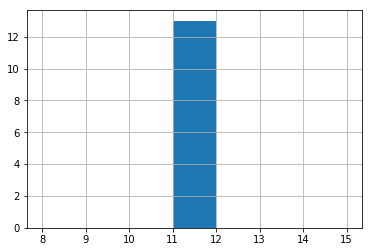

In [108]:
print(min_1_analyzed_df_dist_analysis_exists_only[min_1_analyzed_df_dist_analysis_exists_only["Trade_Prft_Lss"]>0] \
["Hour_of_Entry"].hist(bins=[8,9,10,11,12,13,14,15]))

#### Time distribution of losses

AxesSubplot(0.125,0.125;0.775x0.755)


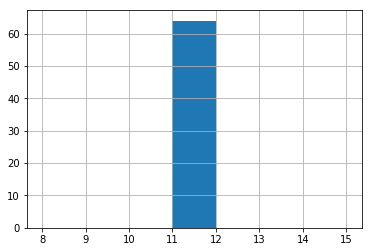

In [109]:
print(min_1_analyzed_df_dist_analysis_exists_only[min_1_analyzed_df_dist_analysis_exists_only["Trade_Prft_Lss"]<=0] \
["Hour_of_Entry"].hist(bins=[8,9,10,11,12,13,14,15]))

## Result (P & L)

# of Trades: 74
        Count    Average
Loss       61 -12.803607
Profit     13   9.383077
Gross P&L: -659.04 (-3.2951999999999995%)
Commission: 148
Slippage: 148.0
Net P&L: -955.04 (-4.7752%)


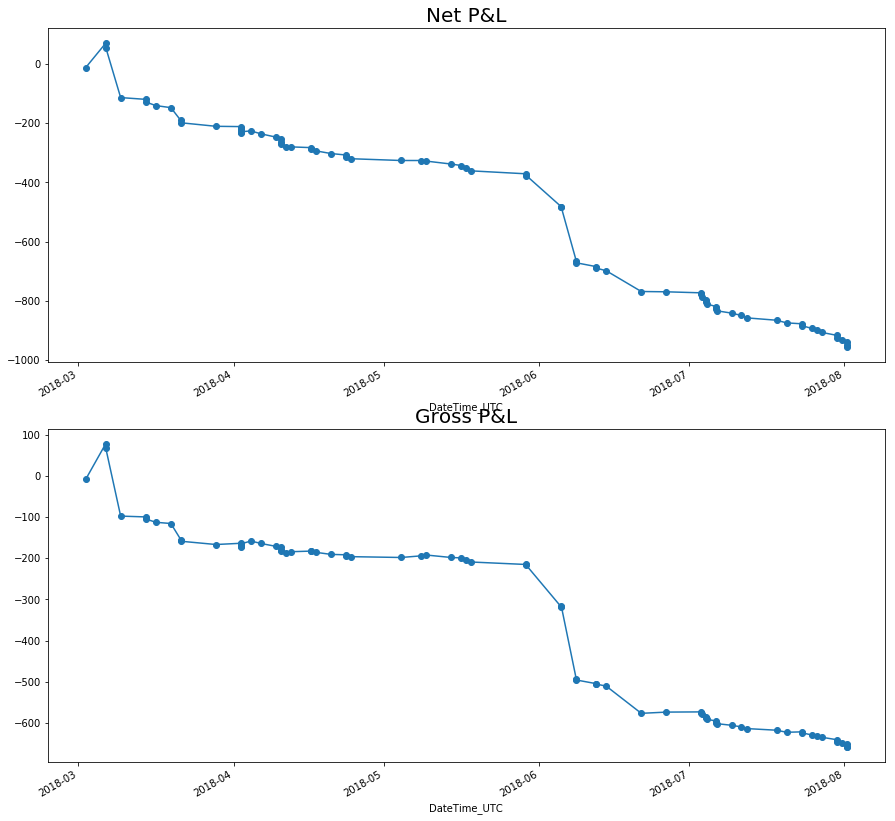

In [110]:
# Gross P&L:
gross_absolute_profit_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].sum()
gross_percent_profit_loss = (gross_absolute_profit_loss/Trade_Size.size)*100

# Commission:
commission = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*2

#Slippage:
slippage = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*(Trade_Size.size/10000)

# Net P&L:
net_absolute_profit_loss = gross_absolute_profit_loss - commission - slippage
net_percent_profit_loss = (net_absolute_profit_loss/Trade_Size.size)*100

# Number of trades:
num_of_trades = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()

profit_vs_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"] > 0
profit_vs_loss.replace({True:"Profit",False:"Loss"}, inplace=True)
s = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"]
P_N_L_Stats = pd.DataFrame({"Count":profit_vs_loss.value_counts().values,"Average":[s[s<0].mean(), 
s[s>0].mean()]},index=profit_vs_loss.value_counts().index)

print("# of Trades: {}".format(num_of_trades))
print(P_N_L_Stats)
print("Gross P&L: {} ({}%)".format(gross_absolute_profit_loss,gross_percent_profit_loss))
print("Commission: {}".format(commission))
print("Slippage: {}".format(slippage))
print("Net P&L: {} ({}%)".format(net_absolute_profit_loss,net_percent_profit_loss))

# Charting P&L:
pnl_chart_df = min_1_analyzed_df["Trade_Prft_Lss"].replace(0,np.NaN)
pnl_chart_df_cumsum = pnl_chart_df[pnl_chart_df < 1000000000].cumsum()
pnl_chart_df_less_comm_and_slip = pnl_chart_df - 2 - Trade_Size.size/10000
pnl_chart_df_less_comm_and_slip_cumsum = pnl_chart_df_less_comm_and_slip[pnl_chart_df_less_comm_and_slip < 1000000000].cumsum()

fig1 = plt.figure(figsize=(15,15))
ax4 = plt.subplot(2,1,1)
ax4.set_title("Net P&L", fontsize=20)
pnl_chart_df_less_comm_and_slip_cumsum.plot(ax=ax4, linestyle="-", marker="o")
ax5 = plt.subplot(2,1,2)
ax5.set_title("Gross P&L", fontsize=20)
pnl_chart_df_cumsum.plot(ax=ax5, linestyle="-", marker="o")
plt.show()
# ax2 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA10"].head(100).plot(ax=ax1, color="r")
# ax3 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA20"].head(100).plot(ax=ax1, color="y")